Instalación de librerías

In [1]:
from app.config import GITHUB_USER, GITHUB_REPO, GITHUB_FOLDER
from app.github_utils import obtener_archivos_github
from app.pdf_utils import cargar_pdfs_desde_github, create_text_splitter
from app.llm_utils import crear_chat, crear_embeddings, crear_prompt
from app.rag_pipeline import generar_embeddings
from app.evaluation import agregar_fila, imprimir_resultados, graficar_pie_respuestas, lista_datos
import sys
import os

sys.path.append(os.path.abspath("../app"))

In [ ]:
# Obtener archivos
archivos = obtener_archivos_github(GITHUB_USER, GITHUB_REPO, GITHUB_FOLDER)

# Preparar splitter y documentos
splitter = create_text_splitter()
docs = cargar_pdfs_desde_github(archivos, GITHUB_USER, GITHUB_REPO, GITHUB_FOLDER, splitter)

# Preparar componentes LLM
embeddings = crear_embeddings()
chat = crear_chat()
prompt = crear_prompt()

# Armar cadena de recuperación
retrieval_chain = generar_embeddings(docs, embeddings, chat, prompt)

Procesando: CV_AlejandroNuñez.pdf
Procesando: CV_AlexanderBenitez.pdf
Procesando: CV_AngelUcedo.pdf
Procesando: CV_ArielSchultz.pdf
Procesando: CV_ArmandoRodriguez.pdf
Procesando: CV_ArnaldoLlanes.pdf
Procesando: CV_AurelioAlmiron.pdf
Procesando: CV_BautistaCarballo.pdf
Procesando: CV_BrunoArguello.pdf
Procesando: CV_CarlosTorres.pdf
Procesando: CV_ChristianDelgado.pdf
Procesando: CV_CindyVeron.pdf
Procesando: CV_CristhianVázquez.pdf.pdf
Procesando: CV_CésarGonzález.pdf
Procesando: CV_DeliaHulskamp.pdf
Procesando: CV_DiogenesBritez.pdf
Procesando: CV_EmanuelMaldonado.pdf
Procesando: CV_FedericoEscobar.pdf
Procesando: CV_FernandoEnciso.pdf
Procesando: CV_FernandoJara.pdf
Procesando: CV_FranciscoLezcano.pdf
Procesando: CV_FranciscoMedina.pdf
Procesando: CV_FreddyGuerrero.pdf
Procesando: CV_GerardoLopez.pdf
Procesando: CV_GloriaLopez.pdf
Procesando: CV_GustavoGonzalez.pdf
Procesando: CV_JorgeBenítez.pdf
Procesando: CV_JorgeBritez.pdf
Procesando: CV_JoseDuarte.pdf
Procesando: CV_JoséBáez.p

Ignoring wrong pointing object 6 0 (offset 0)
Ignoring wrong pointing object 8 0 (offset 0)
Ignoring wrong pointing object 10 0 (offset 0)
Ignoring wrong pointing object 12 0 (offset 0)
Ignoring wrong pointing object 14 0 (offset 0)
Ignoring wrong pointing object 23 0 (offset 0)


Procesando: CV_LuisRios.pdf
Procesando: CV_MarceloGonzalez.pdf
Procesando: CV_MartinFlecha.pdf
Procesando: CV_MartinLegal.pdf
Procesando: CV_MathiasVillasanti.pdf
Procesando: CV_MauriciaRoa.pdf
Procesando: CV_MicaelaMaldonado.pdf
Procesando: CV_OscarGonzalez.pdf
Procesando: CV_OscarSantacruz.pdf
Procesando: CV_PatriciaSanabria.pdf
Procesando: CV_PerlaBareiro.pdf
Procesando: CV_RamonQuintana.pdf
Procesando: CV_RobertoCano.pdf
Procesando: CV_RubenRecalde.pdf
Procesando: CV_SergioMartinez.pdf
Procesando: CV_SoniaLaviosa.pdf
Procesando: CV_TeresaCabrera.pdf
Procesando: CV_WillianPaez.pdf
Procesando: CV_ZileidyArguello.pdf
Procesando: Profile Alejandro Hidalgo.pdf
Procesando: Profile Andrea Garay.pdf
Procesando: Profile Bruno Martinez.pdf
Procesando: Profile Ciro Ferrario.pdf
Procesando: Profile Derlis Caballero.pdf
Procesando: Profile Edgar Cabral.pdf
Procesando: Profile Fabio Diaz.pdf
Procesando: Profile Fatima Maciel.pdf
Procesando: Profile Federico Miguel Vazquez.pdf
Procesando: Profile

# Preguntas y respuestas

In [ ]:
#1 Escribe la pregunta
response = retrieval_chain.invoke({"input": "Listar las personas que trabajan en la empresa ITTI y el cargo que desempeñan en esa empresa?"})
print(response["answer"])

En la empresa ITTI, se mencionan las siguientes personas y los cargos que desempeñan:

1. **Karina Flecha**
   - Cargo: Tech Lead

2. **Roberto Daniel Cano Benítez**
   - Cargos desempeñados: 
     - Analista Técnico
     - Analista Funcional
     - Desarrollador/Implementador

3. **Jorge Dagoberto Benítez Cabana**
   - Cargo: Desarrollador Core Bancario

4. **Livio Zazzi**
   - Cargo: Jefe de operaciones de TI

Estos son los profesionales mencionados en el contexto que trabajan en ITTI y sus respectivos cargos.


In [2]:
agregar_fila(1, "Parcialmente correcta")

**RESPUESTA PARCIALMENTE CORRECTA: No lista a Fernando Encisco y Gerardo Lopez. Livio no trabaja en ITTI; pero por el cargo: Jefe de 'IT' recupera como coincidencia**

In [ ]:
#2 Escribe la pregunta
response = retrieval_chain.invoke({"input": "¿Fernando Manuel Enciso ocupa algún cargo en la empresa -ITTI?"})
print(response["answer"])

Fernando Manuel Enciso no ocupa actualmente un cargo en la empresa ITTI. Según el contexto proporcionado, su experiencia laboral más reciente incluye roles como Gerente de TI en Dia Supermarket y en otras empresas, pero no se menciona que esté vinculado a ITTI en este momento. Sin embargo, el contexto no proporciona información sobre su relación pasada con ITTI, por lo que no se puede afirmar si ha trabajado allí en el pasado. 

En resumen, con la información disponible, Fernando Manuel Enciso no está asociado con ITTI en la actualidad.


In [3]:
agregar_fila(2, "Incorrecta")

**RESPUESTA INCORRECTA: Fernando si trabaja actualmente en ITTI**

In [ ]:
#3 Escribe la pregunta
response = retrieval_chain.invoke({"input": "Sólo responda sobre la información proporcionada para Gerardo Alexis Lopez, ¿Tiene experiencia trabajando con base de datos Oracle?"})
print(response["answer"])

Sí, Gerardo Alexis López tiene experiencia trabajando con bases de datos Oracle. En su currículum se detalla que ha trabajado como Core Banking Engineer en ITTI DIGITAL desde 2021, donde es probable que haya utilizado bases de datos Oracle en su labor. Además, menciona su experiencia previa como programador en Azucarera Paraguaya S.A. entre 2019 y 2021, donde realizó tareas relacionadas con mantenimiento, creación de nuevos reportes, validaciones a nivel de pantallas y base de datos, triggers, procedures, y packages, todos los cuales son aspectos relevantes al trabajar con bases de datos.

En cuanto a sus habilidades informáticas, destaca su conocimiento en PL/SQL para Oracle, así como en Oracle Forms y Reports en diversas versiones (6i, 10g, 11g y 12c). También menciona haber trabajado con gestores de bases de datos Oracle 11g y Oracle APEX, lo que refuerza su experiencia en este ámbito.

Además, en su experiencia profesional específica, ha participado en proyectos de migración de Ora

In [4]:
agregar_fila(3, "Correcta")

**RESPUESTA CORRECTA**

In [ ]:
#3.1 Escribe la pregunta
response = retrieval_chain.invoke({"input": " Gerardo Alexis Lopez, ¿Tiene experiencia trabajando con base de datos Oracle?"})
print(response["answer"])

Sí, Gerardo Alexis López tiene una amplia experiencia trabajando con bases de datos Oracle. A continuación, se detallan sus habilidades y experiencia relacionadas con Oracle:

1. **Habilidades Informáticas en Oracle**:
   - Gerardo es competente en PL/SQL para Oracle, lo que indica su capacidad para escribir procedimientos almacenados, funciones y otros scripts en este lenguaje.
   - Tiene experiencia con Oracle Forms y Reports en varias versiones, incluyendo 6i, 10g, 11g y 12c, lo que sugiere que ha trabajado en el desarrollo y mantenimiento de aplicaciones que utilizan estas herramientas.
   - Ha utilizado gestores de bases de datos Oracle 11g, lo que implica que tiene experiencia en la administración y gestión de bases de datos en esta plataforma.

2. **Experiencia Laboral**:
   - En su rol como Core Banking Engineer en ITTI DIGITAL desde 2021, es probable que haya trabajado con bases de datos Oracle, dado que su experiencia previa está centrada en este entorno.
   - Durante su tiem

**La segunda pregunta trae información de otro CV como por ejemplo:  Gerardo es Oracle SQL Certified Associate**

In [ ]:
#4 Escribe la pregunta
response = retrieval_chain.invoke({"input": "Necesito un resumen del perfil profesional de Karen Riveros"})
print(response["answer"])

Karen Riveros es una ingeniera en informática empresarial con experiencia en análisis de datos e inteligencia de negocios, así como en aseguramiento de calidad (Quality Assurance). Desde marzo de 2023, trabaja de manera remota en Paraguay, habiendo acumulado experiencia tanto en empresas locales como en Alemania. Su enfoque profesional se centra en el desarrollo de soluciones que mejoren la satisfacción del cliente, destacando sus habilidades analíticas, atención al detalle y orientación hacia la resolución de problemas.

En cuanto a su formación académica, Karen está cursando una Maestría en Ciencia de Datos, lo que complementa su sólida base en análisis y procesamiento de datos, visualización de datos, elaboración de métricas y análisis funcional de software. Además, tiene experiencia en pruebas funcionales y capacitación a usuarios.

Su trayectoria laboral incluye una pasantía en BASF SE, donde participó en la digitalización y gestión de proyectos, así como en la elaboración de repo

In [5]:
agregar_fila(4, "Correcta")

**RESPUESTA CORRECTA**

In [ ]:
#5 Escribe la pregunta
response = retrieval_chain.invoke({"input": "Listar el nombre de personas con formación académica de maestría en ciencia de datos"})
print(response["answer"])

Basado en el contexto proporcionado, las personas con formación académica de maestría en ciencia de datos son:

1. **Jorge Dagoberto Benítez Cabana**
   - Maestría en Ciencia de Datos (mar 2024 - presente) en Universidad Comunera, Asunción.

2. **Karen Riveros**
   - Maestría en Ciencia de Datos (2024 - 2025) en Universidad Comunera.

3. **Fernando Manuel Enciso**
   - Diplomado en Ciencias de Datos (2023) en Universidad Comunera. (Nota: No se menciona explícitamente una maestría, pero se incluye por su relevancia en el área de ciencia de datos).

Estas son las personas mencionadas en el contexto que están relacionadas con la formación en ciencia de datos a nivel de maestría o diplomado.


In [6]:
agregar_fila(5, "Correcta")

**RESPUESTA CORRECTA: Fernando Encisco tiene un diplomado en ciencia de datos; el LLM aclara que no tiene una maestría; pero si algunos conocimientos adquiridos en el diplomado**

In [ ]:
#6 Escribe la pregunta
response = retrieval_chain.invoke({"input": "¿Podrías facilitar el nombre y apellido de las personas que han cursado sus estudios en Facultad Politécnica de la Universidad Nacional de Asunción?"})
print(response["answer"])

Claro, a continuación se presentan los nombres y apellidos de las personas que han cursado sus estudios en la Facultad Politécnica de la Universidad Nacional de Asunción, según el contexto proporcionado:

1. **Alejandro Chelli Nuñez** - Cursando la carrera de Ingeniería en Informática.
2. **Delia Hulskamp** - Licenciada en Análisis de Sistemas Informáticos, Ingeniera en Informática, y actualmente cursando un Magíster en TIC con énfasis en Seguridad de la Información.
3. **Francisco Hernán Lezcano Sandoval** - Cursando el 5to Semestre de Licenciatura en Ciencias Informáticas.
4. **Emanuel Lino José Lugo Bordón** - Cursando el 4º semestre de Ingeniería en Informática.
5. **Aurelio Almirón Torres** - Licenciado en Ciencias Informáticas con Énfasis en Análisis de Sistemas.
6. **Luis Alberto Rios Rivarola** - Cursando actualmente la Licenciatura en Ciencias Informáticas con énfasis en Análisis de Sistemas Informáticos, en su 3° año.

Estos son los nombres y apellidos de los individuos menci

In [7]:
agregar_fila(6, "Parcialmente correcta")

**RESPUESTA PARCIALMENTE CORRECTA: Alejandro Chelli no estudia en la Facultad Politécnica**

In [ ]:
#7  Escribe la pregunta
response = retrieval_chain.invoke({"input": " Favor listar el nombre y número de teléfono de todas las personas que estudian o estudiaron la carrera de licenciatura en análisis de sistemas"})
print(response["answer"])

A continuación se presenta la lista de nombres y números de teléfono de las personas que estudian o estudiaron la carrera de Licenciatura en Análisis de Sistemas:

1. **César González**
   - Teléfono: (0971) 640 857

2. **Jorge Dagoberto Benítez Cabana**
   - Teléfono: +595971122993

3. **Alexander José María Benitez Bracho**
   - Teléfono: (021) 595051 - (0981) 487969

4. **Fernando Manuel Enciso**
   - Teléfono: +56998965250

5. **Luis Fernando Capdevila Avalos**
   - Teléfono: +595 961 395948

6. **Arnaldo Manuel Llanes Vázquez**
   - Teléfono: 0995670472

Esta información se ha recopilado del contexto proporcionado.


In [8]:
agregar_fila(7, "Parcialmente correcta")

**RESPUESTA PARCIALMENTE CORRECTA: Arnaldo Manuel Llanes Vázquez, estudió ingeniería.**

In [ ]:
#8  Escribe la pregunta
response = retrieval_chain.invoke({"input": " Favor mencionar el nombre de las personas con perfil de desarrollador backend"})
print(response["answer"])

Basado en el contexto proporcionado, las siguientes personas tienen un perfil de desarrollador backend:

1. **Carlos Cristóbal Torres Carballo**
   - Aptitudes en Back-End con tecnologías como Microsoft ASP.NET, Entity Framework, y más.

2. **Israel Carballo**
   - Desarrollador en mantenimiento y desarrollo de aplicaciones web, utilizando tecnologías como .NET, C#, y SQL Server.

3. **José Báez**
   - Desarrollador de software con experiencia en backend, utilizando Java, Spring Boot, SQL, JPA, y Hibernate.

4. **Jorge Daniel Britez González**
   - Desarrollador FullStack, con experiencia en programación backend en C# y SQL.

5. **Fernando de la Mora**
   - Desarrollador con experiencia en backend utilizando C#, ASP.NET Core, y SQL Server.

6. **Mathias Villasanti**
   - Desarrollador Full Stack, con experiencia en backend y análisis, aunque no se especifican tecnologías concretas en el contexto.

Estos individuos tienen experiencia y habilidades relevantes en desarrollo backend, utili

In [9]:
agregar_fila(8, "Correcta")

**RESPUESTA CORRECTA: El 5to candidato es Jorge Britez, por la forma como está estructurado el CV tomó su dirección como nombre**

In [ ]:
#9  Escribe la pregunta
response = retrieval_chain.invoke({"input": " ¿Cuáles son las habilidades blandas del candidato Willian Paez?"})
print(response["answer"])

Las habilidades blandas del candidato Willian Paez, según el contexto proporcionado, son las siguientes:

1. **Proactividad**: Willian se describe como proactivo, lo que indica que toma la iniciativa y busca oportunidades para mejorar o contribuir sin necesidad de que se le indique.

2. **Capacidad para trabajar en equipo**: Menciona tener predisposición y capacidad para colaborar con otros, lo que es fundamental en entornos laborales donde la cooperación es clave para el éxito de proyectos.

3. **Adaptabilidad**: Tiene la habilidad de adaptarse a distintos ambientes laborales, lo que sugiere que puede ajustarse a nuevas situaciones y desafíos con facilidad.

4. **Autodidacta**: Willian se considera autodidacta, lo que implica que tiene la capacidad de aprender de manera independiente y buscar nuevos conocimientos o habilidades por su cuenta.

5. **Resolución de problemas**: Muestra una inclinación hacia la resolución de problemas, lo que es esencial en el campo tecnológico, donde a me

In [10]:
agregar_fila(9, "Parcialmente correcta")

**RESPUESTA PARCIALMENTE CORRECTA: Proporcionó información adicional que no estaba en el CV**

In [ ]:
#10  Escribe la pregunta
response = retrieval_chain.invoke({"input": " Favor indicar el nombre y email de los candidatos que programan con el lenguaje java o C# o python, Indicar por cada candidato cual lenguaje maneja"})
print(response["answer"])

A continuación se presenta la información de los candidatos que programan con los lenguajes Java, C# o Python, junto con su respectivo email y el lenguaje que manejan:

1. **Oscar Santacruz**
   - **Email:** cctc2013@gmail.com
   - **Lenguajes:** Java, Python

2. **Carlos Cristóbal Torres Carballo**
   - **Email:** cctc2013@gmail.com
   - **Lenguajes:** Java, C#

3. **Jorge Daniel Britez González**
   - **Email:** jorgedanielbritezg@gmail.com
   - **Lenguajes:** C#, Python

4. **Marcelo Nicolás González Vega**
   - **Email:** marcelogonve@gmail.com
   - **Lenguajes:** Java, Python

5. **Cristian Ariel Vera Florentin**
   - **Email:** mroa@excelsis.com.py
   - **Lenguajes:** Java

Estos son los candidatos que cumplen con los requisitos solicitados.


In [11]:
agregar_fila(10, "Correcta")

**RESPUESTA CORRECTA**

In [ ]:
#11  Escribe la pregunta
response = retrieval_chain.invoke({"input": "Favor remitir el nombre de las personas con habilidad de liderazgo de equipos"})
print(response["answer"])

Basado en el contexto proporcionado, se pueden identificar varias personas que tienen habilidades de liderazgo de equipos. A continuación, se detallan sus nombres y roles relevantes:

1. **Karina Flecha** - **Tech Lead** en ITTI. Ella lidera y coordina el equipo técnico del principal core bancario nacional del país, lo que implica habilidades de liderazgo y gestión de equipos.

2. **Lic. Raúl De Los Santos Cáceres Penayo** - **Director de Tecnología** y **Consultor de Negocios & Tecnología**. Se describe a sí mismo como un profesional apasionado por el liderazgo transformacional y la adopción de tecnologías innovadoras, lo que sugiere habilidades en liderazgo de equipos.

3. **Carlos Cristóbal Torres Carballo** - Aunque su perfil se centra más en habilidades técnicas, su experiencia en desarrollo de software y trabajo en equipo sugiere que puede haber ejercido liderazgo en proyectos.

4. **Micaela Maldonado** - **Ingeniera en Tecnologías de la Información Empresarial**. Su experiencia 

In [12]:
agregar_fila(11, "Correcta")

**RESPUESTA CORRECTA: Carlos Cristóbal Torres Carballo, deduce que puede tener liderazgo de equipos, no menciona explícitamente en sus habilidades**

In [ ]:
#12  Escribe la pregunta
response = retrieval_chain.invoke({"input": "Favor remitir el link del perfil en linkedink de las personas con experiencia en base de datos"})
print(response["answer"])

A continuación, se presentan los enlaces de los perfiles de LinkedIn de las personas mencionadas en el contexto que tienen experiencia en bases de datos:

1. **Fabio Ojeda**: No se proporciona un enlace de LinkedIn en el contexto.
   
2. **Jorge Dagoberto Benítez Cabana**: 
   - LinkedIn: [linkedin.com/in/jorge-dagoberto-9338b5169](https://linkedin.com/in/jorge-dagoberto-9338b5169)

3. **Carlos Cristóbal Torres Carballo**: 
   - LinkedIn: [linkedin.com/in/carlos-cristóbal-torres-carballo-012368195](https://linkedin.com/in/carlos-cristóbal-torres-carballo-012368195)

4. **Rubén Darío Domínguez**: No se proporciona un enlace de LinkedIn en el contexto.

5. **Ciro Ferrario**: 
   - LinkedIn: [www.linkedin.com/in/ciro-ferrario-chavez](https://www.linkedin.com/in/ciro-ferrario-chavez)

6. **Federico Escobar**: No se proporciona un enlace de LinkedIn en el contexto.

Si necesitas más información sobre alguna de estas personas o sobre sus experiencias específicas en bases de datos, no dudes e

In [13]:
agregar_fila(12, "Correcta")

**RESPUESTA CORRECTA**

In [ ]:
#13  Escribe la pregunta
response = retrieval_chain.invoke({"input": "Favor remitir el nombre de las personas con certificación CCNA de CISCO"})
print(response["answer"])


Basado en el contexto proporcionado, las siguientes personas tienen certificación CCNA de CISCO:

1. **Fernando David Jara Recalde**
   - Cursando CCNA Routing and Switching en la Universidad Nacional de Asunción.

2. **Alberto Martin Flecha Florentín**
   - Ha completado varios módulos de CCNA: 
     - Módulo I - Introducción de redes TCP-IP (2013)
     - Módulo II - Routing and Switching (2014)
     - Módulo III - Escalamiento de Redes (2015)
     - Módulo IV – Conexiones de Internet (2015)

3. **Teresa Dejesus Cabrera Lezcano**
   - Cursando CISCO CCNA1 en FUNDAINGE - Facultad Ingeniería de la UNA.

4. **Angel Ariel Ucedo Mendoza**
   - Ha completado el CCNA Módulo I - Introducción de redes TCP-IP (2013).

Estas personas han demostrado su conocimiento en redes a través de la certificación CCNA, que es un reconocimiento importante en el campo de la tecnología de redes.


In [14]:
agregar_fila(13, "Parcialmente correcta")

**RESPUESTA PARCIALMENTE CORRECTA: Angel Ucedo no tiene certificación CCNA**

In [ ]:
#14  Escribe la pregunta
response = retrieval_chain.invoke(
    {"input": "Preparar un breve resumen del perfil profesional de candidatos con experiencia laboral en ingeniería de datos o análisis de datos, incluir datos personales, nombre y teléfono"})
print(response["answer"])

### Resumen del Perfil Profesional de Candidatos en Ingeniería de Datos o Análisis de Datos

1. **Fabio Ojeda**
   - **Teléfono:** 0982 191 868
   - **Perfil:** Analista de datos con experiencia en mantenimiento y optimización de bases de datos, gestión de índices y optimización de consultas. Ha trabajado en colaboración con equipos de desarrollo y se mantiene actualizado en las últimas tecnologías. Su enfoque está en proporcionar soluciones efectivas que satisfagan las necesidades de los proyectos y clientes.

2. **Jorge Dagoberto Benítez Cabana**
   - **Teléfono:** +595 971 122 993
   - **Perfil:** Licenciado en Análisis de Sistemas Informáticos con más de 8 años de experiencia en análisis, desarrollo e implementación de sistemas informáticos en entidades financieras. Actualmente cursando una Maestría en Ciencia de Datos. Tiene experiencia en desarrollo de funcionalidades para módulos de core bancario y en modelado de datos.

3. **Freddy Guerrero**
   - **Teléfono:** +595 991 981 278

In [15]:
agregar_fila(14, "Correcta")

**RESPUESTA CORRECTA: Fabio ojeda, figura como referencia de una persona que trabaja como analista de datos, por el formato del CV asoció como una persona con experiencia en esa area.**

In [ ]:
#15  Escribe la pregunta
response = retrieval_chain.invoke(
    {"input": "Listar el nombre y teléfono de las personas con experiencia en desarrollo de core bancario, que nacieron a partir del 1993 y viven en Asunción, Luque, Limpio, Fernando de la mora o Mariano Roque Alonso"})
print(response["answer"])

Basado en el contexto proporcionado, aquí tienes la lista de las personas con experiencia en desarrollo de core bancario, que nacieron a partir de 1993 y viven en Asunción, Luque, Limpio, Fernando de la Mora o Mariano Roque Alonso:

1. **Jorge Dagoberto Benítez Cabana**
   - **Teléfono:** +595971122993
   - **Ubicación:** Isla Bogado, Luque
   - **Fecha de nacimiento:** 24 de julio de 1993

2. **Gerardo Alexis López Mongelos**
   - **Teléfono:** 0983 141 514
   - **Ubicación:** Hernandarias (no se encuentra en las localidades solicitadas, pero se incluye para referencia)
   - **Fecha de nacimiento:** No especificada, pero se menciona que tiene experiencia en core bancario.

3. **Oscar Santacruz**
   - **Teléfono:** 0961853895
   - **Ubicación:** Ñemby (cercano a las localidades solicitadas)
   - **Fecha de nacimiento:** 18/05/1993

Es importante señalar que la información sobre la fecha de nacimiento y la ubicación es clave para cumplir con los criterios solicitados. En este caso, Jorg

In [16]:
agregar_fila(15, "Correcta")

**RESPUESTA CORRECTA**

In [ ]:
# 16  Escribe la pregunta
response = retrieval_chain.invoke(
    {"input": "Lista los nombres de las personas con experiencia laboral en la empresa GRUPO HORUS S.A."})
print(response["answer"])

En el contexto proporcionado, no se menciona ninguna experiencia laboral específica en la empresa GRUPO HORUS S.A. Por lo tanto, no se pueden listar nombres de personas con experiencia laboral en dicha empresa. Si necesitas información sobre otra empresa o algún otro tema, no dudes en preguntar.


In [17]:
agregar_fila(16, "Incorrecta")

**RESPUESTA INCORRECTA: Edgar Missael Cabral Baez menciona a la empresa GRUPO HORUS S.A. como experiencia laboral**



In [ ]:
# 17  Escribe la pregunta
response = retrieval_chain.invoke(
    {"input": "¿Fabio Diaz tiebe experiencia laboral en AGRO Futurista-Coopetrol?"})
print(response["answer"])

agregar_fila(18, "Correcto")

Sí, Fabio Díaz tiene experiencia laboral en AGRO Futurista-Coopetrol. Según el contexto proporcionado, ocupa el cargo de Ingeniero de Sistemas desde noviembre de 2024 hasta la fecha actual, lo que indica que ha estado trabajando allí durante aproximadamente seis meses. En este rol, se espera que Fabio aplique sus habilidades en informática para brindar soluciones efectivas y personalizadas, aunque no se especifican más detalles sobre sus responsabilidades específicas en esta empresa. Su trayectoria profesional también incluye otros roles en el ámbito de la tecnología de la información, lo que sugiere que tiene una sólida experiencia en el campo.


In [18]:
agregar_fila(17, "Correcta")

**RESPUESTA CORRECTA**

# Visualización de resultados

In [27]:
imprimir_resultados(lista_datos)

1: Parcialmente correcta
2: Incorrecta
3: Correcta
4: Correcta
5: Correcta
6: Parcialmente correcta
7: Parcialmente correcta
8: Correcta
9: Parcialmente correcta
10: Correcta
11: Correcta
12: Correcta
13: Parcialmente correcta
14: Correcta
15: Correcta
16: Incorrecta
17: Correcta


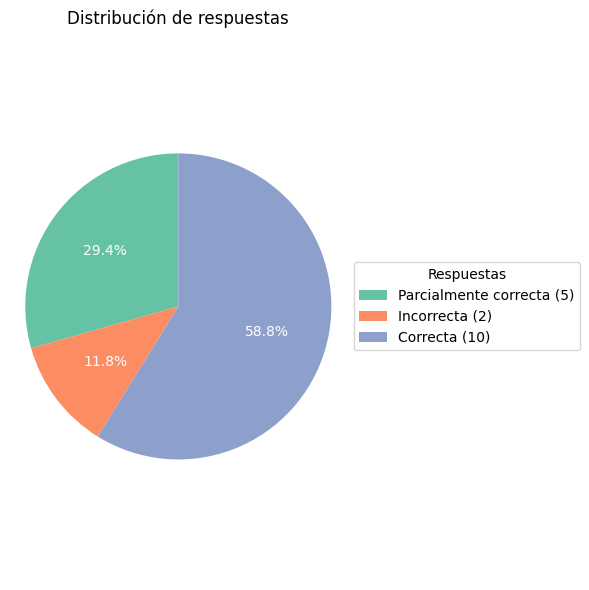

In [33]:
graficar_pie_respuestas(lista_datos)